# Simulation of the 3-variable HIV model, from pages 37–40 of *Modeling Life*. 

#### Equations: 
$$ \begin{cases} V' = 100E - 2V \\ R' = 0.272 - 0.00136R - 0.00027RV \\ E' = 0.00027RV - 0.33E \end{cases}$$

$V = \text{number of viruses}$

$R = \text{number of uninfected T-cells}$

$E = \text{number of infected T-cells}$

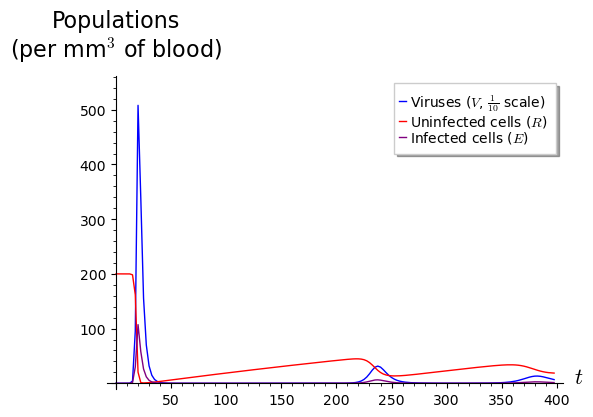

In [8]:
import numpy

# Define our state variables:
state_vars = list(var("V, R, E"))

# Define the vector field for our system of differential equations:
system = (
    100*E - 2*V,
    0.272 - 0.00136*R - 0.00027*R*V,
    0.00027*R*V-0.33*E,
)

# Initial state: 0.0000004 viruses, 200 uninfected T-cells, 0 infected T-cells
initial_state = (4E-7, 200, 0)

# Set up to run the simulation up to t = 400 (days)
t_range = srange(0, 400, 0.025)

# Run the simulation
solution = desolve_odeint(system, initial_state, t_range, state_vars)
solution = numpy.insert(solution, 0, t_range, axis=1)

# Graph the results (time series)
V_plot = list_plot(solution[::100,(0,1)] * (1, 0.1), plotjoined=True,
        color="blue", legend_label="Viruses ($V$, $\\frac{1}{10}$ scale)")
R_plot = list_plot(solution[::100,(0,2)], plotjoined=True,
        color="red", legend_label="Uninfected cells ($R$)")
E_plot = list_plot(solution[::100,(0,3)], plotjoined=True,
        color="purple", legend_label="Infected cells ($E$)")

# Display the graph
show(V_plot + R_plot + E_plot, ymax=550,
        axes_labels=("$t$", "Populations\n(per mm$^3$ of blood)"))

### If you want to play around with this simulation, you can copy and paste the code below into a worksheet of your own, and run it. It will give you an interactive that allows you to change the initial values of the three variables, or to run the simulation for a longer period than 400 days.

In [9]:
import numpy

# Define our state variables:
state_vars = list(var("V, R, E"))

# Define the vector field for our system of differential equations:
system = (
    100*E - 2*V,
    0.272 - 0.00136*R - 0.00027*R*V,
    0.00027*R*V-0.33*E,
)

@interact
def HIV_interactive(initV=slider(10^-7, 10^-6, 10^-7, default=4E-7, label="Initial $V$"),
                    initR=slider(100, 1000, 10, default=200, label="Initial $R$"),
                    initE=slider(0, 100, 1, default=0, label="Initial $E$"),
                    tmax=slider(10, 3660, 10, default=400, label="Simulation length (days)")):
    # Set the initial state
    initial_state = (initV, initR, initE)

    # Set up to run the simulation up to t = 400 (days)
    t_range = srange(0, tmax, 0.025)

    # Run the simulation
    solution = desolve_odeint(system, initial_state, t_range, state_vars)
    solution = numpy.insert(solution, 0, t_range, axis=1)

    # Graph the results (time series)
    V_plot = list_plot(solution[::100,(0,1)] * (1, 0.1), plotjoined=True,
            color="blue", legend_label="Viruses ($V$, $\\frac{1}{10}$ scale)")
    R_plot = list_plot(solution[::100,(0,2)], plotjoined=True,
            color="red", legend_label="Uninfected cells ($R$)")
    E_plot = list_plot(solution[::100,(0,3)], plotjoined=True,
            color="purple", legend_label="Infected cells ($E$)")

    # Display the graph
    show(V_plot + R_plot + E_plot, ymax=550,
            axes_labels=("$t$", "Populations\n(per mm$^3$ of blood)"))

Interactive function <function HIV_interactive at 0x7f9f89fc64c0> with 4 widgets
  initV: SelectionSlider(desc…